Import some necessary libraries

In [ ]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


Process of retrieving the annotated dataset from Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="kUlGu5UeX4jInkawHNvh")
project = rf.workspace("alfaindostruk").project("receipt-indomaret")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Receipt-Indomaret-1 in yolov11:: 100%|██████████| 2412/2412 [00:00<00:00, 2762.13it/s]


In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="kUlGu5UeX4jInkawHNvh")
# project = rf.workspace("alfaindostruk").project("alfamart-indomaret-struk")
# version = project.version(4)
# dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Alfamart-Indomaret-Struk-4 in yolov11:: 100%|██████████| 596/596 [00:00<00:00, 1420.61it/s]


Get the paths for the train and valid datasets, and count the number of images for each dataset.

In [ ]:
dataset_dir = '/content/Receipt-Indomaret-1'

train_dir = os.path.join(dataset_dir, 'train')
valid_dir = os.path.join(dataset_dir, 'valid')

train_images_dir = os.path.join(train_dir, 'images')
train_labels_dir = os.path.join(train_dir, 'labels')

valid_images_dir = os.path.join(valid_dir, 'images')
valid_labels_dir = os.path.join(valid_dir, 'labels')

In [ ]:
train_len = len(os.listdir(train_images_dir))
valid_len = len(os.listdir(valid_images_dir))

print(f'Number of training images: {train_len}')
print(f'Number of validation images: {valid_len}')

Number of training images: 1050
Number of validation images: 100


Define the label according to the dataset
- product_item
- product_item_discount (canceled)
- product_item_voucher (canceled)

In [ ]:
# label_names = ['product_item', 'product_item_discount', 'product_item_voucher']
label_names = ['product_item']

Function to draw the bounding box of the object

In [ ]:
def visualize_bounding_boxes(image_path, annotation_path):
  image = cv2.imread(image_path)
  try:
    annotation = pd.read_csv(annotation_path, delimiter=' ', header=None)

    for _, row in annotation.iterrows():
      label_name = row[0]
      label_name = label_names[int(label_name)]
      print(f'Label name: {label_name}')

      x_center, y_center, width, height = row[1:].values
      x_min = int((x_center - width / 2) * image.shape[1])
      y_min = int((y_center - height / 2) * image.shape[0])
      x_max = int((x_center + width / 2) * image.shape[1])
      y_max = int((y_center + height / 2) * image.shape[0])

      cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
      cv2.putText(image, str(label_name), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  except:
    print(f'No annotation found for {annotation_path}')

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

Display 5 random images from the train dataset with bounding box

Image file: receipt-473_png.rf.bb7980e4aa894f2ff88a3715321f25d2.jpg
Annotation file: /content/Receipt-Indomaret-1/train/labels/receipt-473_png.rf.bb7980e4aa894f2ff88a3715321f25d2.txt
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item


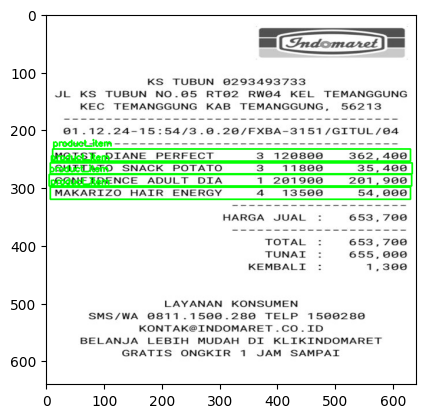


Image file: receipt-370_png.rf.c3d16d0390b859cdc54dec8b946c8d91.jpg
Annotation file: /content/Receipt-Indomaret-1/train/labels/receipt-370_png.rf.c3d16d0390b859cdc54dec8b946c8d91.txt
Label name: product_item


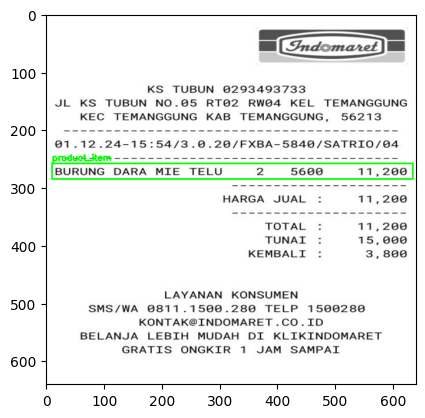


Image file: receipt-252_png.rf.476e1757e623dc60a2a711cb4828bfd1.jpg
Annotation file: /content/Receipt-Indomaret-1/train/labels/receipt-252_png.rf.476e1757e623dc60a2a711cb4828bfd1.txt
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item


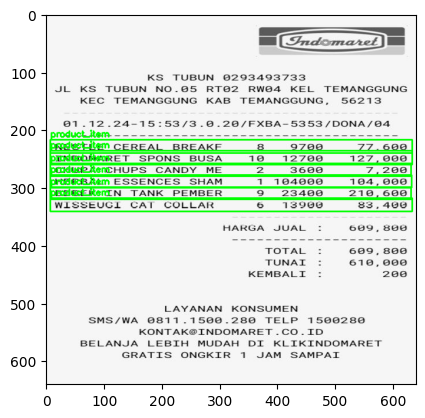


Image file: receipt-109_png.rf.9e54aebd1fb1778918abc6045d34b2a7.jpg
Annotation file: /content/Receipt-Indomaret-1/train/labels/receipt-109_png.rf.9e54aebd1fb1778918abc6045d34b2a7.txt
Label name: product_item
Label name: product_item
Label name: product_item


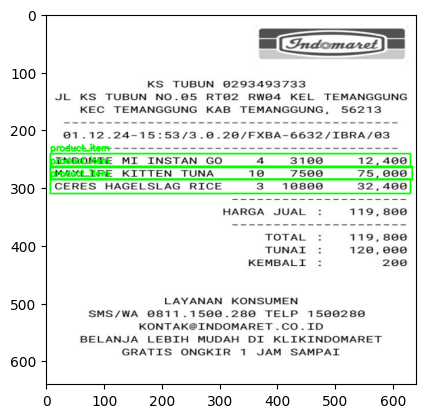


Image file: receipt-142_png.rf.91f2253ed10711889833a262f1ec907c.jpg
Annotation file: /content/Receipt-Indomaret-1/train/labels/receipt-142_png.rf.91f2253ed10711889833a262f1ec907c.txt
Label name: product_item
Label name: product_item
Label name: product_item


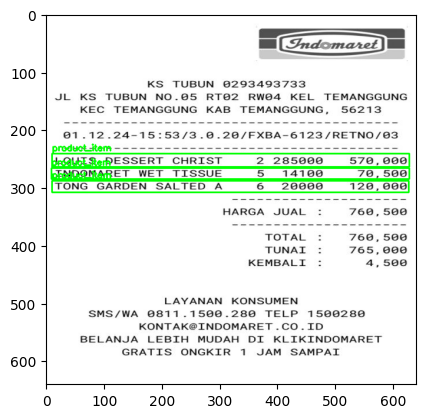

In [ ]:
train_image_files = [file for file in os.listdir(train_images_dir)]
random_train_image_files = random.sample(train_image_files, 5)

for random_train_image_file in random_train_image_files:
  image_path = os.path.join(train_images_dir, random_train_image_file)
  annotation_path = os.path.join(train_labels_dir, random_train_image_file.replace('.jpg', '.txt'))

  print(f'Image file: {random_train_image_file}')
  print(f'Annotation file: {annotation_path}')
  visualize_bounding_boxes(image_path, annotation_path)
  print()

Calculate the object distribution for each label, then visualize it using a bar graph.

In [ ]:
train_annotation_files = [file for file in os.listdir(train_labels_dir)]

label_names_count = {label: 0 for label in label_names}
empty_train_annotation_files = []

for train_annotation_file in train_annotation_files:
  train_annotation_file = os.path.join(train_labels_dir, train_annotation_file)
  try:
    annotation = pd.read_csv(train_annotation_file, delimiter=' ', header=None)
  except:
    empty_train_annotation_files.append(train_annotation_file)
    continue

  for label in annotation[0]:
    label_names_count[label_names[label]] += 1

print(f'Empty train annotation files: {len(empty_train_annotation_files)}')
print(label_names_count)

Empty train annotation files: 0
{'product_item': 4632}


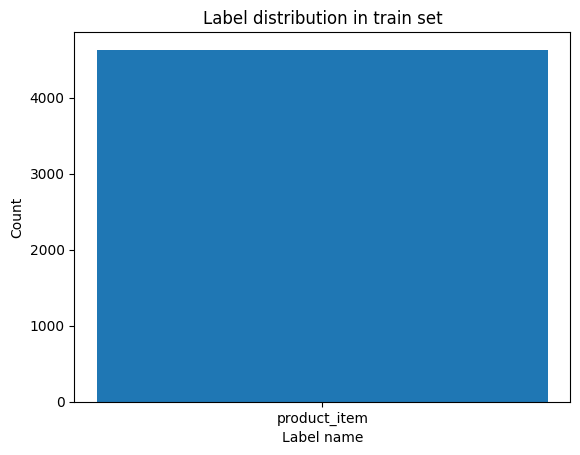

In [ ]:
plt.bar(label_names_count.keys(), label_names_count.values())
plt.xlabel('Label name')
plt.ylabel('Count')
plt.title('Label distribution in train set')
plt.show()

Install the ultralytics library to use YOLO as an object detection library

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 21.7 MB/s eta 0:00:00


Import YOLO library

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo checks

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.7/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torch               ✅ 2.5.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.66.6>=4.64.0
psu

Import YOLO model, use the latest model: yolo11n

In [ ]:
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.5MB/s]


Train the object detection model using the previously defined dataset. Use 200 epochs (based on feedback from ML tech)

In [ ]:
results = model.train(
    data='/content/Receipt-Indomaret-1/data.yaml',
    epochs=200,
    optimizer='NAdam',
    save=True,
    verbose=True,
    lr0=1e-3,
    plots=True,
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Receipt-Indomaret-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Receipt-Indomaret-1/train/labels... 1050 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1050/1050 [00:00<00:00, 1824.60it/s]

train: New cache created: /content/Receipt-Indomaret-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Receipt-Indomaret-1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1360.62it/s]

val: New cache created: /content/Receipt-Indomaret-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: NAdam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.62G      2.408      2.114      1.827         71        640: 100%|██████████| 66/66 [00:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        100        428      0.192      0.673      0.569       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.44G      1.527      1.105      1.224        107        640: 100%|██████████| 66/66 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100        428      0.469      0.769      0.581      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.43G      1.462     0.9929      1.168        119        640: 100%|██████████| 66/66 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        100        428       0.58       0.87      0.718      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.45G      1.339     0.8599      1.135         97        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        100        428      0.563      0.893       0.67      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.46G      1.277     0.7961      1.084         78        640: 100%|██████████| 66/66 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        100        428       0.63      0.909      0.716       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.47G      1.201     0.7084      1.025         70        640: 100%|██████████| 66/66 [00:20<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        100        428      0.565      0.944      0.772      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.48G      1.163     0.6661      1.008         64        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        100        428      0.851      0.857      0.941      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.44G      1.152     0.6523     0.9911         72        640: 100%|██████████| 66/66 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        100        428      0.842      0.874      0.929      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.43G      1.147     0.6303      0.995        116        640: 100%|██████████| 66/66 [00:20<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        100        428      0.815      0.897       0.94      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.43G      1.116      0.609     0.9665        102        640: 100%|██████████| 66/66 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        100        428      0.836      0.938      0.951      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.46G      1.096      0.582      0.958         60        640: 100%|██████████| 66/66 [00:21<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        100        428      0.791        0.9      0.944      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.44G        1.1     0.5696     0.9488        104        640: 100%|██████████| 66/66 [00:20<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        100        428      0.795      0.878      0.932      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.45G      1.065     0.5569     0.9354        109        640: 100%|██████████| 66/66 [00:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        100        428      0.733      0.982      0.922        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.44G      1.064     0.5434     0.9289         84        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        100        428      0.781       0.94      0.946      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.44G      1.042     0.5344     0.9209        122        640: 100%|██████████| 66/66 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        100        428       0.77      0.991      0.953      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.45G       1.04     0.5361     0.9206        128        640: 100%|██████████| 66/66 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        100        428      0.872      0.872       0.96      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.43G       1.04     0.5284     0.9212         88        640: 100%|██████████| 66/66 [00:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all        100        428      0.886      0.912      0.969      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.42G      1.022     0.5093     0.9156         78        640: 100%|██████████| 66/66 [00:21<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100        428      0.881      0.883      0.951      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.43G      1.028      0.507     0.9018         75        640: 100%|██████████| 66/66 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        100        428       0.83      0.904      0.953      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.45G      1.003      0.505     0.9142        124        640: 100%|██████████| 66/66 [00:20<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        100        428      0.842      0.867      0.953      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.44G      1.006     0.5084      0.905        103        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        100        428      0.875      0.916      0.972      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.46G      1.018     0.4997     0.9058         81        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        100        428      0.866      0.936      0.964      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.49G     0.9817     0.4867     0.8954         64        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        100        428      0.808      0.988      0.951      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.43G     0.9723     0.4874     0.8988        102        640: 100%|██████████| 66/66 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        100        428      0.942      0.923      0.973      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.46G     0.9907      0.483     0.9108        115        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        100        428      0.806      0.974      0.955      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.45G     0.9859     0.4915     0.8972         89        640: 100%|██████████| 66/66 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        100        428      0.794      0.958      0.934      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.47G     0.9705     0.4701     0.8872         58        640: 100%|██████████| 66/66 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        100        428      0.895      0.973       0.98      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.39G     0.9613     0.4602     0.8812         77        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        100        428      0.796      0.994      0.963      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.45G      0.963     0.4682     0.8909         65        640: 100%|██████████| 66/66 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        100        428      0.823      0.899       0.95      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.44G     0.9676     0.4591      0.891         94        640: 100%|██████████| 66/66 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        100        428      0.898      0.979      0.978      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.43G      1.322      1.226      1.163         79        640: 100%|██████████| 66/66 [00:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        100        428      0.086     0.0981     0.0472    0.00974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.45G      1.155     0.8929      1.009         72        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        100        428      0.778      0.734      0.835      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.43G      1.032      0.625     0.9166        108        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all        100        428      0.876      0.907      0.963      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.43G     0.9927     0.5589     0.9041         88        640: 100%|██████████| 66/66 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        100        428      0.876      0.857      0.948      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.45G     0.9802     0.5175      0.891        101        640: 100%|██████████| 66/66 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        100        428      0.905      0.864      0.963      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.43G     0.9703     0.4992     0.8909         92        640: 100%|██████████| 66/66 [00:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        100        428       0.83      0.927      0.941      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.47G     0.9645     0.4852       0.88         74        640: 100%|██████████| 66/66 [00:22<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        100        428      0.903      0.986      0.975      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.46G      0.956     0.4717     0.8792         60        640: 100%|██████████| 66/66 [00:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        100        428      0.942      0.928      0.985       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.45G     0.9744     0.4867     0.8937        118        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        100        428      0.941      0.939      0.984      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.47G     0.9535      0.477     0.8783         85        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100        428      0.881      0.982      0.975      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.43G     0.9482     0.4686     0.8789         75        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        100        428      0.782      0.972      0.941      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.44G     0.9503     0.4625     0.8768        100        640: 100%|██████████| 66/66 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        100        428       0.94      0.921      0.984      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.41G     0.9423     0.4559     0.8757         97        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        100        428      0.878      0.942      0.971      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.45G     0.9369     0.4496     0.8816         95        640: 100%|██████████| 66/66 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100        428       0.91      0.926      0.979      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.42G     0.9456     0.4551     0.8805         93        640: 100%|██████████| 66/66 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        100        428      0.908      0.942      0.976      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.45G     0.9318      0.452     0.8752         79        640: 100%|██████████| 66/66 [00:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        100        428      0.904      0.946      0.981       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.47G     0.9131     0.4316     0.8659        112        640: 100%|██████████| 66/66 [00:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        100        428      0.974      0.951      0.991      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.44G     0.9272     0.4429     0.8703         98        640: 100%|██████████| 66/66 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        100        428      0.935      0.986      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.43G     0.9179     0.4356      0.872         88        640: 100%|██████████| 66/66 [00:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]

                   all        100        428       0.95       0.97      0.991      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       2.5G     0.9082     0.4354     0.8745        110        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        100        428      0.872      0.981      0.978      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.46G      0.924     0.4312     0.8697        119        640: 100%|██████████| 66/66 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100        428      0.987      0.939      0.992      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.46G     0.9201     0.4382     0.8667         91        640: 100%|██████████| 66/66 [00:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        100        428      0.776      0.979      0.952      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.44G     0.9173     0.4292     0.8692         97        640: 100%|██████████| 66/66 [00:21<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        100        428      0.842      0.963      0.964      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.46G     0.9114     0.4286     0.8663         89        640: 100%|██████████| 66/66 [00:19<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        100        428      0.965      0.975      0.993      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.44G     0.9008     0.4238     0.8609        114        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        100        428      0.895      0.974      0.982      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.46G     0.9064     0.4184     0.8647         98        640: 100%|██████████| 66/66 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        100        428      0.864      0.972      0.975      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.45G     0.9115     0.4244     0.8697        116        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        100        428       0.97      0.977      0.994       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.43G     0.8993     0.4196     0.8688        129        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        100        428      0.969      0.984      0.993      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.45G     0.8883     0.4177     0.8689         67        640: 100%|██████████| 66/66 [00:21<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]

                   all        100        428      0.977      0.981      0.993      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.43G      0.915      0.427     0.8638        103        640: 100%|██████████| 66/66 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        100        428      0.906      0.963      0.984       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.45G     0.8914     0.4145     0.8604         85        640: 100%|██████████| 66/66 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        100        428      0.937      0.986      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.47G     0.9057     0.4243      0.869         85        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        100        428      0.963      0.966      0.991      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.46G     0.8886     0.4199     0.8689         71        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100        428      0.923      0.972      0.988      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.47G     0.9087     0.4197     0.8667         77        640: 100%|██████████| 66/66 [00:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        100        428      0.998      0.986      0.995      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.43G     0.8956     0.4136     0.8606         81        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100        428      0.851      0.976      0.973       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.47G     0.8917      0.409     0.8563         87        640: 100%|██████████| 66/66 [00:21<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        428      0.914      0.989      0.987      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.45G     0.8966     0.4172     0.8674        114        640: 100%|██████████| 66/66 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        100        428      0.944      0.984      0.992      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.43G     0.8919     0.4137     0.8634         81        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        100        428      0.942      0.988      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.44G     0.8877     0.4057     0.8586        120        640: 100%|██████████| 66/66 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100        428      0.979      0.996      0.994      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.44G     0.8954     0.4092      0.865        113        640: 100%|██████████| 66/66 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        100        428       0.94      0.988      0.992       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.43G     0.8783     0.4058     0.8556         77        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        100        428      0.911      0.978      0.986      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.47G     0.8873     0.4096       0.86         92        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all        100        428      0.927      0.965      0.985      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.52G     0.8801     0.4044     0.8589         81        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all        100        428      0.978      0.995      0.995      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200       2.5G      0.895     0.4118     0.8584        112        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        100        428      0.897      0.978      0.979      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.54G     0.9001     0.4276     0.8663         62        640: 100%|██████████| 66/66 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        100        428      0.894      0.914      0.968      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.51G     0.8996     0.4184     0.8691         88        640: 100%|██████████| 66/66 [00:20<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all        100        428      0.932      0.989      0.991       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.44G     0.8839     0.4032       0.86         59        640: 100%|██████████| 66/66 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        100        428      0.991      0.981      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.44G     0.8977     0.4106     0.8668         72        640: 100%|██████████| 66/66 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        100        428      0.944      0.984      0.991      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.54G     0.8707     0.3995     0.8576         62        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        100        428      0.939      0.976      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.47G     0.8796     0.4035     0.8589         61        640: 100%|██████████| 66/66 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        100        428      0.942      0.986       0.99      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.43G     0.8689     0.3941     0.8628         78        640: 100%|██████████| 66/66 [00:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]

                   all        100        428      0.927      0.986       0.99       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.44G     0.8788     0.4016     0.8539         85        640: 100%|██████████| 66/66 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        100        428      0.903      0.981      0.986      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.46G      0.881     0.4008     0.8626         96        640: 100%|██████████| 66/66 [00:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        100        428      0.949        0.9      0.981      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.45G     0.8749     0.4002     0.8596        100        640: 100%|██████████| 66/66 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        100        428      0.979       0.98      0.994      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.44G     0.8678     0.3917     0.8595         89        640: 100%|██████████| 66/66 [00:23<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        100        428      0.942      0.998      0.991      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.43G     0.8802     0.3965     0.8559         89        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        100        428      0.992      0.977      0.995      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.43G     0.8687     0.3925     0.8488         84        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        100        428      0.945      0.986      0.993      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.43G     0.8792     0.3998      0.858         98        640: 100%|██████████| 66/66 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100        428      0.965      0.977      0.993      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.47G      0.875     0.3945      0.861         83        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100        428      0.983      0.954      0.991      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.47G       0.88     0.3985     0.8556         94        640: 100%|██████████| 66/66 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all        100        428      0.963       0.98      0.992      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.44G     0.8889     0.4116     0.8627        104        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        100        428      0.868      0.998      0.972      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.46G      0.878     0.4028     0.8548         95        640: 100%|██████████| 66/66 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        100        428      0.973      0.981      0.993      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.43G     0.8772     0.4042     0.8607        117        640: 100%|██████████| 66/66 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        100        428      0.908      0.973      0.985      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.43G     0.8784     0.3994     0.8671        109        640: 100%|██████████| 66/66 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        100        428      0.964      0.998      0.992      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.46G     0.8739     0.3971     0.8599        130        640: 100%|██████████| 66/66 [00:21<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        100        428      0.937      0.979      0.989      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.46G     0.8664     0.3923      0.852         90        640: 100%|██████████| 66/66 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        100        428      0.993      0.991      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.43G     0.8694     0.3986     0.8538         74        640: 100%|██████████| 66/66 [00:21<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        100        428      0.976      0.991      0.993      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.44G     0.8567      0.388     0.8559         43        640: 100%|██████████| 66/66 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        100        428      0.986      0.985      0.995      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.45G     0.8717     0.3894     0.8537         82        640: 100%|██████████| 66/66 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        100        428      0.968      0.991      0.994      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.43G     0.8506     0.3847     0.8615         79        640: 100%|██████████| 66/66 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        100        428      0.992      0.932      0.978      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.45G     0.8571     0.3868     0.8574         92        640: 100%|██████████| 66/66 [00:23<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        100        428      0.973      0.995      0.994      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.44G     0.8658      0.387     0.8558        100        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        100        428      0.979      0.994      0.992      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.47G     0.8629     0.3929     0.8584         67        640: 100%|██████████| 66/66 [00:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        100        428      0.979      0.978      0.994       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.45G     0.8581     0.3849     0.8613         82        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        100        428      0.965      0.979      0.993      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.46G     0.8629      0.388     0.8553        110        640: 100%|██████████| 66/66 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        100        428      0.931      0.993      0.988      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.47G     0.8617     0.3927     0.8618         93        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        100        428      0.967      0.973      0.993      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.46G     0.8683     0.3919     0.8626        109        640: 100%|██████████| 66/66 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        100        428      0.957       0.98      0.991      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.46G     0.8604     0.3873     0.8579         77        640: 100%|██████████| 66/66 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        100        428      0.964      0.987      0.993      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.45G     0.8665     0.3914     0.8539        111        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        100        428      0.893      0.972       0.98       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.46G     0.8525     0.3853     0.8569        126        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100        428      0.936      0.991      0.989      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.47G     0.8534     0.3817     0.8541         87        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

                   all        100        428      0.934      0.999      0.991      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.43G     0.8538     0.3809     0.8547        103        640: 100%|██████████| 66/66 [00:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100        428      0.963      0.998      0.994       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.46G     0.8526     0.3778     0.8558         93        640: 100%|██████████| 66/66 [00:21<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        100        428      0.841      0.991      0.975      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.45G     0.8574     0.3773     0.8567         92        640: 100%|██████████| 66/66 [00:21<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100        428      0.998      0.982      0.995      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.45G      0.844     0.3746     0.8541         65        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        100        428      0.984      0.991      0.995      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.45G     0.8574     0.3822     0.8522         90        640: 100%|██████████| 66/66 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        428      0.958      0.972      0.991      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.46G     0.8559     0.3815     0.8499         92        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        100        428      0.932      0.956      0.989      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.43G     0.8572     0.3782     0.8532         96        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        100        428      0.887      0.974      0.984      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.43G     0.8583      0.386     0.8579         82        640: 100%|██████████| 66/66 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        100        428      0.925      0.974      0.985      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.46G     0.8498     0.3791     0.8523        116        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        100        428       0.97      0.985      0.994      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.51G     0.8445     0.3775     0.8507         93        640: 100%|██████████| 66/66 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        100        428      0.961      0.974      0.993      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.47G     0.8572     0.3834     0.8499        109        640: 100%|██████████| 66/66 [00:21<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        100        428      0.965      0.979      0.993      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.45G       0.84       0.37     0.8492         80        640: 100%|██████████| 66/66 [00:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        100        428      0.943      0.971      0.989      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.44G     0.8466     0.3769     0.8528         83        640: 100%|██████████| 66/66 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        100        428      0.949       0.96      0.986       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.45G     0.8614     0.3765     0.8562        122        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        100        428      0.932      0.965      0.989      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.43G     0.8416       0.37     0.8515        106        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        100        428      0.905      0.996      0.987      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.46G     0.8466     0.3768     0.8479        111        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        100        428      0.948      0.972      0.992      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.47G     0.8403     0.3722     0.8484        106        640: 100%|██████████| 66/66 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100        428      0.968      0.989      0.993      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.44G     0.8463     0.3737     0.8528         95        640: 100%|██████████| 66/66 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        100        428      0.958      0.991      0.993      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.48G      0.848     0.3752     0.8532        125        640: 100%|██████████| 66/66 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]

                   all        100        428      0.938      0.967      0.989      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.47G      0.848     0.3736     0.8489         59        640: 100%|██████████| 66/66 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        100        428      0.888      0.967      0.981      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.43G     0.8392     0.3745     0.8523         77        640: 100%|██████████| 66/66 [00:22<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        100        428      0.882      0.992      0.983      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.44G     0.8423     0.3749     0.8519         68        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        100        428      0.974      0.975      0.993      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.43G     0.8323     0.3688     0.8499         56        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        100        428      0.946      0.986      0.988      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.46G     0.8369     0.3641     0.8565        116        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100        428      0.948      0.982      0.991      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.44G     0.8486     0.3746     0.8492        107        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        100        428      0.964      0.972       0.99      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.43G     0.8413     0.3708     0.8516        117        640: 100%|██████████| 66/66 [00:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        100        428      0.976      0.984      0.994      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.44G     0.8415     0.3685     0.8507        111        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all        100        428      0.936      0.984      0.987      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.48G     0.8302     0.3662     0.8502         71        640: 100%|██████████| 66/66 [00:20<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        100        428      0.939      0.979       0.99      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.44G     0.8398      0.363     0.8514         97        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        100        428      0.858      0.998      0.973      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.43G     0.8417     0.3698     0.8491         87        640: 100%|██████████| 66/66 [00:21<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        100        428      0.909      0.984       0.98      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.47G     0.8413     0.3677     0.8485        109        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        100        428      0.931      0.976      0.984      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.45G      0.836      0.364     0.8507         99        640: 100%|██████████| 66/66 [00:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        100        428       0.92      0.977      0.988      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.44G     0.8345     0.3607     0.8523         75        640: 100%|██████████| 66/66 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        100        428      0.909      0.972      0.986      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.45G     0.8382     0.3617     0.8478         70        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        100        428      0.966      0.985      0.993      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.43G     0.8346     0.3616     0.8527         78        640: 100%|██████████| 66/66 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        100        428      0.966      0.998      0.994      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.46G     0.8508     0.3714     0.8462         90        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        100        428      0.965      0.986      0.993      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.45G     0.8315     0.3643     0.8458         79        640: 100%|██████████| 66/66 [00:22<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        100        428       0.95          1      0.993      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.45G     0.8417     0.3659     0.8474         74        640: 100%|██████████| 66/66 [00:20<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

                   all        100        428      0.967      0.988      0.994      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.45G     0.8275      0.365     0.8522         79        640: 100%|██████████| 66/66 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        100        428      0.923      0.907      0.972      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.45G     0.8393     0.3638     0.8489         74        640: 100%|██████████| 66/66 [00:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        100        428      0.942      0.988       0.99      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.45G     0.8377     0.3623     0.8475         69        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]

                   all        100        428      0.963      0.984      0.993      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.45G     0.8357      0.363     0.8494         79        640: 100%|██████████| 66/66 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        100        428      0.956      0.964      0.992      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.44G     0.8405     0.3635     0.8503         77        640: 100%|██████████| 66/66 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        100        428      0.902       0.99      0.985      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.45G     0.8243     0.3609     0.8508         82        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        428      0.939      0.965      0.987      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.46G     0.8331     0.3604     0.8468        116        640: 100%|██████████| 66/66 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        100        428      0.869      0.991      0.978      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.46G     0.8344     0.3595     0.8487         94        640: 100%|██████████| 66/66 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100        428      0.974      0.998      0.994      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.43G      0.829     0.3597     0.8476         80        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        100        428       0.97          1      0.994      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.47G     0.8283     0.3579     0.8513         92        640: 100%|██████████| 66/66 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all        100        428      0.968      0.986      0.993      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.45G     0.8329     0.3589     0.8504         87        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        100        428      0.964      0.989      0.994      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.45G     0.8322     0.3622     0.8505         95        640: 100%|██████████| 66/66 [00:21<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        100        428      0.988      0.992      0.995      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.45G     0.8244     0.3601     0.8498         56        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        100        428      0.995      0.982      0.995      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.45G     0.8356     0.3623     0.8479         96        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        100        428      0.927          1      0.985      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.43G     0.8279     0.3565     0.8484         86        640: 100%|██████████| 66/66 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        100        428      0.936      0.953      0.989      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.44G     0.8276     0.3505     0.8478        125        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        100        428      0.868          1       0.98      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.46G     0.8306     0.3568     0.8485         66        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        100        428      0.859          1      0.977      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.46G     0.8343     0.3551     0.8489         95        640: 100%|██████████| 66/66 [00:22<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        100        428      0.932          1       0.99      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.44G      0.822      0.354     0.8515        106        640: 100%|██████████| 66/66 [00:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        100        428      0.954      0.961      0.989      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.47G     0.8199     0.3493     0.8493         75        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        100        428       0.97       0.96      0.993       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.44G     0.8232     0.3507     0.8451        126        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        100        428      0.975      0.986      0.994       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.43G     0.8214     0.3529     0.8498         93        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        100        428      0.951      0.988      0.991      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.45G     0.8206     0.3494     0.8451        102        640: 100%|██████████| 66/66 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        100        428      0.972      0.967      0.993      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.45G     0.8263     0.3522     0.8473         72        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all        100        428       0.97      0.991      0.994      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.45G     0.8224     0.3488     0.8439         98        640: 100%|██████████| 66/66 [00:20<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100        428      0.943          1      0.992       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.46G      0.826     0.3514     0.8435         66        640: 100%|██████████| 66/66 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        100        428      0.965          1      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.45G     0.8201      0.348     0.8434         91        640: 100%|██████████| 66/66 [00:21<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        100        428      0.949      0.988      0.992      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.45G     0.8283     0.3552     0.8456         90        640: 100%|██████████| 66/66 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        100        428       0.97      0.984      0.994       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.45G     0.8289     0.3477     0.8479         60        640: 100%|██████████| 66/66 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        100        428      0.965      0.978      0.992      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.43G     0.8286     0.3512     0.8483         87        640: 100%|██████████| 66/66 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        100        428      0.954      0.981      0.992      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.47G     0.8143     0.3445      0.852         51        640: 100%|██████████| 66/66 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100        428      0.922          1      0.989      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.43G     0.8214     0.3453     0.8465         75        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        100        428      0.961      0.986      0.993      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.44G     0.8223     0.3461     0.8462         98        640: 100%|██████████| 66/66 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        100        428      0.968      0.989      0.993      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.43G      0.818     0.3442      0.845        128        640: 100%|██████████| 66/66 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        100        428      0.968      0.993      0.993      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.46G     0.8248     0.3493     0.8445         53        640: 100%|██████████| 66/66 [00:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        100        428      0.946       0.99      0.991      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.44G     0.8257       0.35     0.8453        119        640: 100%|██████████| 66/66 [00:20<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        100        428      0.975      0.994      0.994       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.44G     0.8144     0.3442     0.8498        107        640: 100%|██████████| 66/66 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        100        428      0.961      0.986      0.993       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.44G       0.83     0.3512     0.8486        128        640: 100%|██████████| 66/66 [00:21<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        100        428      0.969      0.993      0.994      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.44G     0.8216     0.3432     0.8487         98        640: 100%|██████████| 66/66 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100        428      0.953      0.989      0.992      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.45G     0.8118     0.3404     0.8441        111        640: 100%|██████████| 66/66 [00:20<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        100        428      0.968      0.981      0.993       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.53G     0.8211     0.3444      0.845        119        640: 100%|██████████| 66/66 [00:21<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        100        428      0.961      0.993      0.993      0.682


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.55G     0.9564      0.384     0.7936         48        640: 100%|██████████| 66/66 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        100        428      0.966      0.982      0.993      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.41G     0.9601       0.39     0.7878         54        640: 100%|██████████| 66/66 [00:20<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]

                   all        100        428      0.966      0.977      0.991      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200       2.4G     0.9552     0.3744     0.7948         50        640: 100%|██████████| 66/66 [00:21<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        100        428      0.941      0.981       0.99       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.41G     0.9616     0.3822      0.784         38        640: 100%|██████████| 66/66 [00:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        100        428      0.931      0.985      0.989      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200       2.4G     0.9359     0.3777     0.7944         43        640: 100%|██████████| 66/66 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        100        428       0.93      0.974      0.989      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.41G     0.9402      0.377     0.7942         40        640: 100%|██████████| 66/66 [00:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        100        428      0.944      0.981       0.99      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       2.4G     0.9446     0.3761     0.7955         42        640: 100%|██████████| 66/66 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all        100        428      0.952      0.978      0.991      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.41G     0.9515     0.3871     0.7842         52        640: 100%|██████████| 66/66 [00:20<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        100        428       0.94      0.981      0.991      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200       2.4G     0.9462      0.379      0.798         41        640: 100%|██████████| 66/66 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        100        428      0.929      0.978      0.989       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.41G     0.9439     0.3793     0.7897         54        640: 100%|██████████| 66/66 [00:21<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all        100        428       0.94      0.986       0.99      0.684



200 epochs completed in 1.312 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all        100        428      0.972      0.985      0.994       0.69
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


Export the model that has been trained in engine format to be deployed to the api

In [ ]:
model.export(format='engine')

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 310.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 346.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 235.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 254.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 317.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 21.0s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim',

'runs/detect/train/weights/best.engine'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!zip -r "/content/runs/detect/train/weights.zip" "/content/runs/detect/train/weights"

  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.onnx (deflated 13%)
  adding: content/runs/detect/train/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train/weights/best.engine (deflated 17%)
  adding: content/runs/detect/train/weights/last.pt (deflated 9%)


In [ ]:
predict_results = model.predict('/content/Alfamart-Indomaret-Struk-4/test/images')


image 1/13 /content/Alfamart-Indomaret-Struk-4/test/images/CamScanner-18-11-2024-12-48_19_jpg.rf.2cf227968003152d59b893a89e065ed5.jpg: 640x640 7 product_items, 2 product_item_discounts, 5 product_item_vouchers, 10.8ms
image 2/13 /content/Alfamart-Indomaret-Struk-4/test/images/CamScanner-18-11-2024-12-48_27_jpg.rf.255c9ec39056f4600bff67eb9d76cbb4.jpg: 640x640 1 product_item, 16.4ms
image 3/13 /content/Alfamart-Indomaret-Struk-4/test/images/CamScanner-18-11-2024-12-48_31_jpg.rf.d689dab74ec8d63e94c5c6eccd384f87.jpg: 640x640 2 product_items, 1 product_item_discount, 10.9ms
image 4/13 /content/Alfamart-Indomaret-Struk-4/test/images/CamScanner-18-11-2024-12-48_3_jpg.rf.32c4e920e810805b3cb06f5098040a38.jpg: 640x640 4 product_items, 11.2ms
image 5/13 /content/Alfamart-Indomaret-Struk-4/test/images/CamScanner-18-11-2024-12-48_46_jpg.rf.bcc9bfb032edc243393608b9933b28f0.jpg: 640x640 2 product_items, 1 product_item_discount, 11.0ms
image 6/13 /content/Alfamart-Indomaret-Struk-4/test/images/CamSca

In [ ]:
!yolo val model=/content/runs/detect/train/weights/best.pt data=/content/Receipt-Indomaret-1/data.yaml split=test

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Receipt-Indomaret-1/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<00:00, 515.13it/s]
val: New cache created: /content/Receipt-Indomaret-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.38it/s]
                   all         50        185      0.981      0.995      0.994      0.716
Speed: 5.6ms preprocess, 14.2ms inference, 0.0ms loss, 15.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r "runs-receipt-product-item-detection-v2.zip" "runs"

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/val/ (stored 0%)
  adding: runs/detect/val/val_batch2_labels.jpg (deflated 18%)
  adding: runs/detect/val/val_batch0_pred.jpg (deflated 17%)
  adding: runs/detect/val/R_curve.png (deflated 17%)
  adding: runs/detect/val/P_curve.png (deflated 20%)
  adding: runs/detect/val/PR_curve.png (deflated 29%)
  adding: runs/detect/val/val_batch1_labels.jpg (deflated 17%)
  adding: runs/detect/val/val_batch0_labels.jpg (deflated 17%)
  adding: runs/detect/val/confusion_matrix_normalized.png (deflated 39%)
  adding: runs/detect/val/val_batch2_pred.jpg (deflated 17%)
  adding: runs/detect/val/F1_curve.png (deflated 16%)
  adding: runs/detect/val/confusion_matrix.png (deflated 37%)
  adding: runs/detect/val/val_batch1_pred.jpg (deflated 16%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/train_batch12541.jpg (deflated 13%)
  adding: runs/detect/train/weights.zip (stored 0%)
  adding: runs/detec